In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import matplotlib.tri as plttri

from qiskit import *
from qiskit.extensions import Initialize

from matplotlib.collections import LineCollection
import itertools
import random
import sys


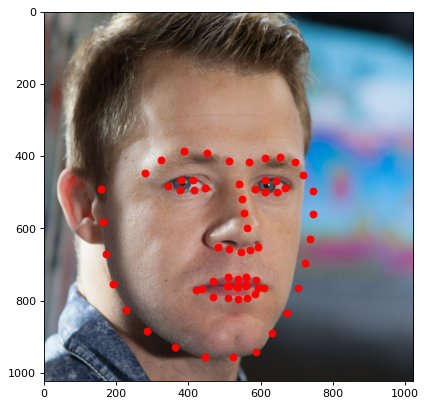

In [2]:
def load_images_in_folder(folder, label):
    """load all the images (file ending with .png) within the given folder. Expects the image filename is a five digits code
    'xxxxx' and that the file 'xxxxx_landmarks.json' exists within the same folder. Return a structure containing for each image:
    the path of the image, the given label, the set of landmark points."""
    container = []
    # get a list of all files ending with '.png' within the given folder
    images = filter(lambda f: f.endswith('.png'), os.listdir(folder))
    # for each png file:
    for filename in images:
        # get the id, which is the filename without extension
        id = os.path.splitext(filename)[0]
        # calculate the path of the corrisponding landmark points file
        landmarks_path = "{}/{:05d}_landmarks.json".format(folder, int(id))
        # add the current item into the container
        container.append({
            "image": "{}/{}".format(folder, filename),
            "label": label,
            "landmarks": json.load(open(landmarks_path))
        })
    return container
def visualize_image(face):

    image = pltimg.imread(face["image"])
    x, y = zip(*face["landmarks"]["image"]['face_landmarks']) # divide the list of (x,y) tuple in the list of x's and y's

    plt.figure(figsize=(8, 6), dpi=80) # set width of figure
    plt.imshow(image) # show image
    plt.scatter(x, y, color='red') # overlay the landmark points in red over the image
    plt.show() # show picture
faces_dataset = []
faces_dataset += load_images_in_folder(r"C:\Users\mattc\Downloads\Happy_Data_Set\Happy_Data_Set", "happy")
faces_dataset += load_images_in_folder(r"C:\Users\mattc\Downloads\Sad_Data_Set\Sad_Data_Set", "sad")
#print(faces_dataset[0]["landmarks"]["image"]['face_landmarks'])
visualize_image(faces_dataset[13])

In [24]:
def processJSON(path):
    file = open(path)
    data = json.load(file)
    numbers = ["1213","1171","1027","1045","1078","1011","1048","1066"]
    for i in numbers:
        newJson = data[i]
        first = r"C:\Users\mattc\Downloads\Sad_Data_Set\Sad_Data_Set\0"
        last = "_landmarks.json"
        final = first + i + last
        out_file = open(final, "w")
        json.dump(newJson, out_file)
    numbers = ["198","210"]
    for i in numbers:
        newJson = data[i]
        first = r"C:\Users\mattc\Downloads\Sad_Data_Set\Sad_Data_Set\00"
        last = "_landmarks.json"
        final = first + i + last
        out_file = open(final, "w")
        json.dump(newJson, out_file)
    file.close()
    #"C:\Users\mattc\Downloads\ffhq-dataset-v2.json"
processJSON(r"C:\Users\mattc\Downloads\ffhq-dataset-v2.json")

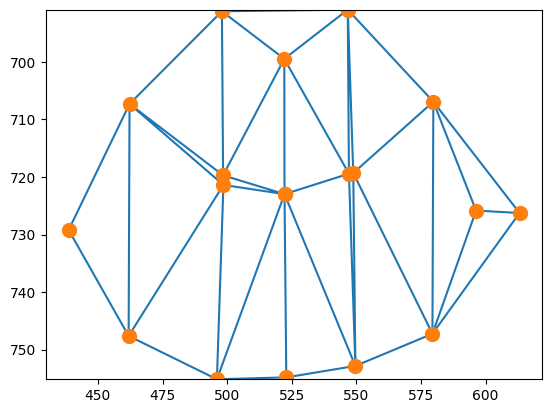

array([ 53.97120065,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  56.17008634,  41.72167302,  50.14742466,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  35.80598414,  72.60133608,
         0.        , 169.55059717,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        17.38313263,  36.96539598,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  38.39794916,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  12.54159479,  35.79389473,   0.        ,
         0.        ,   0.        ,   0.        ,  50.6232091 ,
        96.97884821,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  15.54809956,   0.        ,   0.  

In [4]:
def build_chordal_graph(the_coordinates):
    """Given a list of N items in form (x,y), return the N*N matrix representing 
    the weighted undirected graph whose vertices are the points, an edge exists 
    between the couple of points decided by the Delaunay triangulation procedure, 
    and is labelled with the distance between them"""
    N = len(the_coordinates)            # find the number of coordinates
    graph = np.zeros((N,N))             # create an N*N matrix initializated to zero
    x, y = zip(*the_coordinates)        # split (x,y) into array of x's and array of y's
    triang = plttri.Triangulation(x, y) # calculate Delaunay triangulation
    # for each edge decided by the Delaunay triangulation procedure:
    for edge in triang.edges:
        i, j = edge[0], edge[1]
        point_i, point_j = the_coordinates[i], the_coordinates[j]
        distance = np.linalg.norm(np.asarray(point_i) - np.asarray(point_j))
        graph[i][j] = distance
        graph[j][i] = distance
    return graph
def pick_upper_triangular_wo_diagonal(matrix):
    """Given an N*N matrix, return a vector of (N-1)*(N-2) elements containing the items of the input matrix in the upper triangular without diagonal positions"""
    N, _ = matrix.shape
    return matrix[np.triu_indices(N, k=1)] # k=1 removes the diagonal
def graph_with_lines(the_coordinates):
    N = len(the_coordinates)            # find the number of coordinates
    graph = np.zeros((N,N))             # create an N*N matrix initializated to zero
    x, y = zip(*the_coordinates)        # split (x,y) into array of x's and array of y's
    triang = plttri.Triangulation(x, y) # calculate Delaunay triangulation
    plt.triplot(triang, marker='o', markersize=10)        
    x, y = zip(*the_coordinates)
    plt.scatter(x, y, color='red') # overlay the landmark points in red over the image
    plt.ylim(max(y), min(y))
    plt.show()
    
    
    
    
graph_with_lines(faces_dataset[15]["landmarks"]["image"]['face_landmarks'][49:68])
np.set_printoptions(threshold=sys.maxsize)
#print(len(build_chordal_graph(faces_dataset[15]["landmarks"]["image"]['face_landmarks'])))
#pick_upper_triangular_wo_diagonal(build_chordal_graph(faces_dataset[15]["landmarks"]["image"]['face_landmarks'][49:68]))
pick_upper_triangular_wo_diagonal(build_chordal_graph(faces_dataset[0]["landmarks"]["image"]['face_landmarks'][49:68]))


In [8]:
def zero_padding(vector, qubits):
    """Given a complex vector of size n, adds up zeros until size 2**qubits is reached"""
    zeros = np.zeros((2**qubits,), dtype=np.cdouble)
    zeros[:len(vector)] = vector
    return zeros
def normalize(vector):
    """Return the normalized input vector"""
    max_iter = 10
    while np.linalg.norm(vector) != 1.0 and max_iter > 0:
        vector = vector / np.linalg.norm(vector)
        max_iter -= 1
    return vector
np.set_printoptions(threshold=sys.maxsize)
G_happy = pick_upper_triangular_wo_diagonal(build_chordal_graph(faces_dataset[19]["landmarks"]["image"]['face_landmarks'][49:68]))
qubit_per_feature = int(np.ceil(np.log2(len(G_happy))))
#zero_padding(, qubit_per_feature)
x_1 = zero_padding(G_happy,qubit_per_feature)
x_0 = normalize(x_1)
print(list(np.array(x_0).real))

[0.11052584819009349, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09870330390360983, 0.11586057348508046, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11808969963736404, 0.12970167440925798, 0.25096170225258163, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09138496370954124, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1325768092348081, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13685660401503563, 0.07631019615646994, 0.14602613626138572, 0.0, 0.0, 0.0, 0.0, 0.19453750672924128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09868391979114367, 0.0, 0.0, 0.0, 0.0, 0.22950086457039628, 0.21308809854725683, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18466312435701526, 0.1557738032320589, 0.20168523297187646, 0.0, 0.0, 0.22130220634013098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07923019703628732, 0.0, 0.0, 0.0, 0.18466312435701526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16718853527733837, 0.22646493522813382, 0.0, 0.0, 0.1366402704242804, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17478080975688245, 0.21713285241087718, 0.0, 0.1325

In [46]:
def controlled_initialize(normalized_vector, control_qubits):
    # create the circuit for initialization with leading Reset gates
    initialize_circuit = Initialize(normalized_vector)
    # gates_to_uncompute inverts the circuit, removing the Reset gates
    # and by inverting again we obtain the initialization circuit w/o Reset
    initialize_circuit_wo_reset = initialize_circuit.gates_to_uncompute().inverse()
    # return controlled version of the gate
    return initialize_circuit_wo_reset.control(control_qubits)

In [47]:
def quantum_distance_circuit(G_happy, G_sad, G_test):
    """Create the quantum circuit for classification"""
    # calculate how many qubits are needed for the data register
    qubit_per_feature = int(np.ceil(np.log2(len(G_happy))))
    # zero padding and normalization
    x_0 = normalize(zero_padding(G_happy, qubit_per_feature))
    x_1 = normalize(zero_padding(G_sad, qubit_per_feature))
    x_test = normalize(zero_padding(G_test, qubit_per_feature))
    # define the registers
    qr_auxiliary = QuantumRegister(1, 'anc')
    qr_index = QuantumRegister(1, 'index')
    qr_data = QuantumRegister(qubit_per_feature, 'data')
    qr_class = QuantumRegister(1, 'class')
    cr_auxiliary = ClassicalRegister(1, 'cr_anc')
    cr_class = ClassicalRegister(1, 'cr_class')
    # initialize the circuit
    qc = QuantumCircuit(qr_auxiliary, qr_index, qr_data, qr_class, cr_auxiliary, cr_class)
    # initialize index and data registers
    qc.h([0, 1])
    qc.append(controlled_initialize(x_test, 1), [qr_auxiliary[0] ] + qr_data[:])
    qc.x(0)
    qc.append(controlled_initialize(x_0, 2), [qr_auxiliary[0], qr_index[0] ] + qr_data[:])
    qc.x(1)
    qc.append(controlled_initialize(x_1, 2), [qr_auxiliary[0], qr_index[0] ] + qr_data[:])
    # correlate the index with the class
    qc.cx(qr_index[0], qr_class[0]) 
    # work on auxiliary
    qc.h(0)
    # measure
    qc.measure(qr_auxiliary[0], cr_auxiliary[0])
    qc.measure(qr_class[0], cr_class[0])
    return qc


In [51]:
def quantum_distance(G_happy, G_sad, G_test, tol=0.00001, backend=None):
    """Creates the quantum circuit, runs it and return the difference between the two distances and the expected label"""
    SHOTS = 10000
    qc = quantum_distance_circuit(G_happy, G_sad, G_test)
    # custom backend
    if backend is None:
        backend = Aer.get_backend('qasm_simulator')
    counts = execute(qc, backend, shots=SHOTS).result().get_counts()
    # add missing values
    keys = ['0 0', '0 1', '1 0', '1 1'] # LSB = auxiliary, MSB = Class
    for key in keys:
        if key not in counts:
            counts[key] = 0
    # calculate distance
    keep_auxiliary_zero = False # you can equivalently keep results having auxiliary = 0 or auxiliary = 1
    if keep_auxiliary_zero:
        distance_happy = counts['1 0']
        distance_sad   = counts['0 0']
    else:
        distance_happy = counts['0 1']
        distance_sad   = counts['1 1']
    difference = (distance_happy - distance_sad)/SHOTS
    the_difference = 0 if np.abs(difference) <= tol else difference
    return difference, ["EQUAL", "SAD", "HAPPY"][int(np.sign(the_difference))]
happy = pick_upper_triangular_wo_diagonal(build_chordal_graph(faces_dataset[19]["landmarks"]["image"]['face_landmarks'][49:68]))
sad = pick_upper_triangular_wo_diagonal(build_chordal_graph(faces_dataset[19]["landmarks"]["image"]['face_landmarks'][49:68]))
test = pick_upper_triangular_wo_diagonal(build_chordal_graph(faces_dataset[19]["landmarks"]["image"]['face_landmarks'][49:68]))
quantum_distance(happy,sad,test)

(0.0, 'EQUAL')